In [27]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
image_name = "cts.png"

In [28]:
# image_location = "test_img/cat.png"
# image_location = "test_img/reverse.png"
# image_location = "test_img/place.png"
# image_location = "test_img/cts.png"
image_location = "test_img/"+image_name
img = cv2.imread(image_location,0)



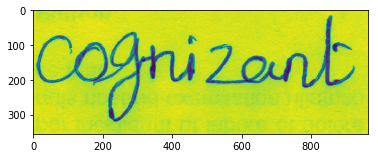

In [29]:
plt.imshow(img)

# Thresh - Binary 


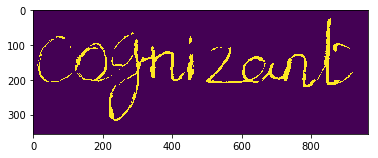

In [30]:
res , thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

# Skeletonize

In [31]:
import numpy as np
import cv2
from imutils import resize
from imutils.contours import sort_contours

from skimage.morphology import skeletonize as skl

# path = 'test_img/cat.png'
# path = "test_img/place.png"
# path = "test_img/cts.png"
path = "test_img/"+image_name
# path = 'test_img/reverse.png'
img = cv2.imread(path, 0)
# Some smoothing to get rid of the noise
# img = cv2.bilateralFilter(img, 5, 35, 10)
img = cv2.GaussianBlur(img, (3, 3), 3)
# img = resize(img, width=700)

# Preprocessing to get the shapes
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 11)
# Invert to hightligth the shape
th = cv2.bitwise_not(th)

# Text has mostly vertical and right-inclined lines. This kernel seems to
# work quite well
kernel = np.array([[0, 1, 1],
                  [0, 1, 0],
                  [1, 1, 0]], dtype='uint8')

th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)

cv2.imshow('mask', th)
cv2.waitKey(0)


#def contour_sorter(contours):
#    '''Sort the contours by multiplying the y-coordinate and sorting first by
#    x, then by y-coordinate.'''
#    boxes = [cv2.boundingRect(c) for c in contours]
#    cnt = [4*y, x for y, x, , _, _ in ]

# Skeletonize the shapes
# Skimage function takes image with either True, False or 0,1
# and returns and image with values 0, 1.
th = th == 255
th = skl(th)
th = th.astype(np.uint8)*255

# Find contours of the skeletons
_, contours, _ = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL,
                                  cv2.CHAIN_APPROX_NONE)
# Sort the contours left-to-rigth
contours, _ = sort_contours(contours, )
#
# Sort them again top-to-bottom


def skeleton_endpoints(skel):
    # Function source: https://stackoverflow.com/questions/26537313/
    # how-can-i-find-endpoints-of-binary-skeleton-image-in-opencv
    # make out input nice, possibly necessary
    skel = skel.copy()
    skel[skel != 0] = 1
    skel = np.uint8(skel)

    # apply the convolution
    kernel = np.uint8([[1,  1, 1],
                       [1, 10, 1],
                       [1,  1, 1]])
    src_depth = -1
    filtered = cv2.filter2D(skel, src_depth,kernel)

    # now look through to find the value of 11
    # this returns a mask of the endpoints, but if you just want the
    # coordinates, you could simply return np.where(filtered==11)
    out = np.zeros_like(skel)
    out[np.where(filtered == 11)] = 1
    rows, cols = np.where(filtered == 11)
    coords = list(zip(cols, rows))
    return coords

# List for endpoints
endpoints = []
# List for (x, y) coordinates of the skeletons
skeletons = []



for contour in contours:
    if cv2.arcLength(contour, True) > 100:
        # Initialize mask
        mask = np.zeros(img.shape, np.uint8)
        # Bounding rect of the contour
        x, y, w, h = cv2.boundingRect(contour)
        mask[y:y+h, x:x+w] = 255
        # Get only the skeleton in the mask area
        mask = cv2.bitwise_and(mask, th)
        # Take the coordinates of the skeleton points
        rows, cols = np.where(mask == 255)
        # Add the coordinates to the list
        skeletons.append(list(zip(cols, rows)))
        

        # Find the endpoints for the shape and update a list
        eps = skeleton_endpoints(mask)
        endpoints.append(eps)

        # Draw the endpoints
#         [cv2.circle(th, ep, 5, 255, 1) for ep in eps]
        cv2.imshow('mask', mask)
        cv2.waitKey(500)
# cv2.imwrite("res/l_cat.png",th)# Stack the original and modified
# cv2.imwrite("res/l_reverse.png",th)# Stack the original and modified
# cv2.imwrite("res/l_place.png",th)# Stack the original and modified
# cv2.imwrite("res/l_cts.png",th)# Stack the original and modified
cv2.imwrite("res/l_"+image_name+".png",th)# Stack the original and modified

th = resize(np.hstack((img, th)), 1200)


#    cv2.waitKey(50)

# TODO
# Walk the points using the endpoints by minimizing the walked distance
# Points in between can be used many times, endpoints only once
cv2.imshow('mask', th)
cv2.waitKey(0)
cv2.destroyAllWindows()


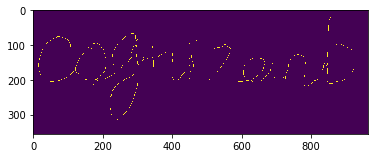

In [32]:
# skel_img = cv2.imread("res/l_cat.png",0)
# skel_img = cv2.imread("res/l_place.png",0)
# skel_img = cv2.imread("res/l_cts.png",0)
skel_img = cv2.imread("res/l_"+image_name+".png",0)
# skel_img = cv2.imread("res/l_reverse.png",0)
plt.imshow(skel_img)

# Turn to transpose 

In [33]:
trnspse_img = np.transpose(skel_img)

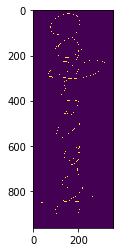

In [34]:
plt.imshow(trnspse_img)

# Calculate the median of the word

In [35]:
up = []
down = []
for val in trnspse_img:
    temp = []
    for i , value in enumerate(val):
        if(value>0):
            temp.append(i)
    try:
        up.append(temp[0])
        down.append(temp[-1])
    except : 
        pass
    

In [36]:
up_avg = sum(up)//len(up)
print (up_avg)

135


In [37]:
down_avg = sum(down) // len(down)
print (down_avg)

195


In [38]:
median = ( up_avg + down_avg ) // 2
print (median)

165


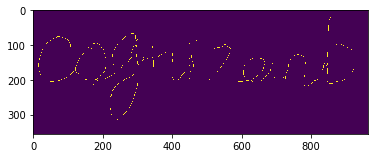

In [39]:
copy_of_original = skel_img.copy()
plt.imshow(copy_of_original)

# Draw line in median in copy 

In [40]:
copy_of_original[median] = [255] * len(copy_of_original[median])

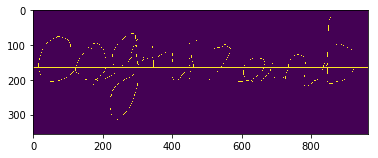

In [41]:
plt.imshow(copy_of_original)

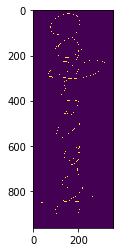

In [42]:
# Transpose look of median drawn image 
plt.imshow(np.transpose(copy_of_original))

In [43]:
# checking from down till median for single 255 and sum of that val == 255 
sp_list = [] # Segmentation Points
for i , val in enumerate(trnspse_img):
    if (sum(val[median:]) == 255 and sum(val) == 255):
        sp_list.append(i)

In [ ]:
#from Top to bottom 
# checking from down till median for single 255 and sum of that val == 255 
sp_list_t = [] # Segmentation Points
for i , val in enumerate(trnspse_img):
    if (sum(val[:median]) == 255 and sum(val) == 255):
        sp_list_t.append(i)

In [ ]:
# print(sp_list_t)

In [44]:
print (sp_list)

[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 423, 424, 427, 428, 429, 430, 431, 432, 433, 435, 436, 438, 439, 440, 501, 502, 503, 504, 505, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 668, 670, 671, 673, 674, 675, 676, 677, 678, 679, 680, 681, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 730, 732, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 826, 828, 832, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 917, 919]


# To find Consecutive elements 

In [45]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [46]:
res_list = consecutive(sp_list)

In [ ]:
# from Top
res_list_t = consecutive(sp_list_t)

In [47]:
for lst in res_list:
    print (lst)

[111 112 113 114 115 116 117 118 119 120 121]
[211 212 213 214 215 216 217 218 219 220]
[403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421]
[423 424]
[427 428 429 430 431 432 433]
[435 436]
[438 439 440]
[501 502 503 504 505]
[569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586
 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604]
[668]
[670 671]
[673 674 675 676 677 678 679 680 681]
[690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707
 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725]
[730]
[732]
[785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 802
 803 804]
[806 807 808 809 810 811 812 813 814 815 816 817]
[826]
[828]
[832]
[857 858 859 860 861 862 863 864 865 866 867]
[917]
[919]


In [ ]:
#from Top
for lst in res_list_t:
    print (lst)

In [48]:
avg_of_blocks = []
#from top
avg_of_blocks_t = []

In [49]:
for lst in res_list:
    if(len(lst) > 7):
        avg_of_blocks.append(sum(lst)//len(lst))

In [50]:
print(avg_of_blocks)

[116, 215, 412, 586, 677, 707, 794, 811, 862]


In [ ]:
#from Top
for lst in res_list_t:
#     if(len(lst) > ):
    avg_of_blocks_t.append(sum(lst)//len(lst))

In [51]:
# Saving splliting of u , v, w 
new_avg_block = []
new_avg_block.append(avg_of_blocks[0])

for i , val in enumerate(avg_of_blocks):
    try:
        temp = (avg_of_blocks[i+1]-avg_of_blocks[i])
        if(temp > 70):
            new_avg_block.append(avg_of_blocks[i+1])
    except:
        pass

In [52]:
print (new_avg_block)

[116, 215, 412, 586, 677, 794]


In [ ]:
#from Top
# Saving splliting of m , n , h , 
new_avg_block_t = []
new_avg_block_t.append(avg_of_blocks_t[0])
for i , val in enumerate(avg_of_blocks_t):
    try:
        temp = (avg_of_blocks_t[i+1]-avg_of_blocks_t[i])
        if(temp > 60):
            new_avg_block_t.append(avg_of_blocks_t[i+1])
    except:
        pass

In [ ]:
print (new_avg_block)

In [ ]:
print (new_avg_block_t)

# This is a new way of hacking

In [ ]:
combine_copy = skel_img.copy()
plt.imshow(combine_copy)

In [ ]:
new_combined_list = [] + new_avg_block
for val in new_avg_block_t:
    for i , vl in enumerate(new_avg_block):
        try:
            if(val-vl > 80 and new_avg_block[i+1]-val > 80):
                new_combined_list.append(val)
                break
        except:
            pass
    

In [ ]:
new_combined_list = sorted(new_combined_list)

In [ ]:
new_transpose_copy = np.transpose(combine_copy)

In [ ]:
plt.imshow(new_transpose_copy)

In [ ]:
for val in new_combined_list:
    new_transpose_copy[val] = [255] * len(new_transpose_copy[val])
plt.imshow(new_transpose_copy)

In [ ]:
# cv2.imwrite("res/res_cts_combined.png",np.transpose(new_transpose_copy))
cv2.imwrite("res/res_"+image_name+"_combined.png",np.transpose(new_transpose_copy))
# cv2.imwrite("res/res_place_combined.png",np.transpose(new_transpose_copy))

# Tried but not working 

In [ ]:
transpose_of_copy = np.transpose(copy_of_original)

In [ ]:
#for top
transpose_of_copy_t = np.transpose(copy_of_original)

In [ ]:
plt.imshow(transpose_of_copy)

In [ ]:
plt.imshow(transpose_of_copy_t)

In [ ]:
# for val in avg_of_blocks:
#     transpose_of_copy[val] = [255] * len(transpose_of_copy[val])
for val in new_avg_block:
    transpose_of_copy[val] = [255] * len(transpose_of_copy[val])

In [ ]:
#from Top
# for val in avg_of_blocks:
#     transpose_of_copy[val] = [255] * len(transpose_of_copy[val])
for val in new_avg_block_t:
    transpose_of_copy_t[val] = [255] * len(transpose_of_copy_t[val])

In [ ]:
plt.imshow(transpose_of_copy)

In [ ]:
plt.imshow(transpose_of_copy_t)

In [ ]:
plt.imshow(np.transpose(transpose_of_copy))

In [ ]:
plt.imshow(np.transpose(transpose_of_copy_t))

In [ ]:
# cv2.imwrite("res/res_reverse.png",np.transpose(transpose_of_copy))
# cv2.imwrite("res/res_place.png",np.transpose(transpose_of_copy))
# cv2.imwrite("res/res_cts.png",np.transpose(transpose_of_copy))
cv2.imwrite("res/res_"+image_name+".png",np.transpose(transpose_of_copy))

In [ ]:
#from Top
# cv2.imwrite("res/res_reverse.png",np.transpose(transpose_of_copy))
# cv2.imwrite("res/res_place.png",np.transpose(transpose_of_copy))
cv2.imwrite("res/res_"+image_name+"_t.png",np.transpose(transpose_of_copy_t))

In [ ]:
# Checking for a way to save u, v, w

print (avg_of_blocks)
print (new_avg_block)

In [ ]:
#checking diff between next and this 
for i , val in enumerate(avg_of_blocks):
    try:
        print (avg_of_blocks[i+1]-avg_of_blocks[i])
    except:
        pass
    

In [ ]:
#checking diff between next and this 
for i , val in enumerate(new_avg_block):
    try:
        print (new_avg_block[i+1]-new_avg_block[i])
    except:
        pass
    

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
import pickle 
import json
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
# load json and create model
json_file = open('model_num.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model_num.h5")
print("Loaded model from disk")

# model.save('model_num.hdf5')
loaded_model=load_model('model_num.hdf5')

In [ ]:
[255] * 10 

In [ ]:
# segmenting roi 
print (new_avg_block)

In [ ]:
work = (np.transpose(transpose_of_copy))

In [ ]:
plt.imshow(work)

In [ ]:
work.size

In [ ]:
plt.imshow(skel_img[0:210,0:204])

In [ ]:
# contour_identify = 
w_img = cv2.resize(thresh[0:240,648:748],(50,50))
vv = []
vv.append(w_img)
plt.imshow(w_img)

V = np.array(vv).reshape(-1,50,50,1)
clss = loaded_model.predict_proba(V)

In [ ]:
predicted =  clss.argmax(axis=-1)

In [ ]:
print (predicted)

In [ ]:
chr(97+16)

In [ ]:
import cv2

In [ ]:
cv2.boundingRect(thresh[0:240,648:748])

In [ ]:
x, y, w, h = cv2.boundingRect(thresh[0:240,516:748])
roi = thresh[y:y+h, x:x+w]
plt.imshow(roi)

In [ ]:
w_img = cv2.resize(roi,(50,50))
vv = []
vv.append(w_img)
plt.imshow(w_img)

V = np.array(vv).reshape(-1,50,50,1)
clss = loaded_model.predict_proba(V)

In [ ]:
print(clss)